In [1]:
# Import the dependencies.
from pathlib import Path
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats as st

In [2]:
# Import cleaned data and create DataFrame
data_file = Path("Resources/cleaned_nba_data.csv")
cleaned_nba_data_df = pd.read_csv(data_file)
cleaned_nba_data_df.head()

,player,position,age,team,games played,games scored,avg minutes played,avg field goals made,avg field goals attempted,field goal made %,...,total free-throw shots attempted,total offensive rebounds,total defensive rebounds,total rebounds,total assists,total steals,total blocks,total turnovers,total personal fouls,total points scored
0,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,...,15.5,6.2,31.0,37.2,58.9,15.5,0.0,18.6,31.0,226.3
1,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,...,123.9,41.3,70.8,118.0,53.1,35.4,11.8,64.9,82.6,377.6
2,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,...,639.6,229.6,352.6,582.2,213.2,90.2,73.8,254.2,205.0,1828.6
3,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,...,102.0,18.0,132.0,144.0,210.0,72.0,12.0,114.0,96.0,486.0
4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,...,37.0,7.4,40.7,48.1,70.3,25.9,3.7,48.1,51.8,166.5


## Question 1:
### Does age affect performance, as measured by FG%, PPG, minutes played, etc.?

In [3]:
# Drop columns not needed for age analysis
age_group_df = cleaned_nba_data_df.drop(columns=
                                        ["player",
                                         "team",
                                         "position",
                                         "avg minutes played",
                                         "avg field goals made",
                                         "avg field goals attempted",
                                         "avg three-point shots made",
                                         "avg three-point shots attempted",
                                         "avg two-point shots made",
                                         "avg two-point shots attempted",
                                         "avg free-throw shots made",
                                         "avg free-throw shots attempted",
                                         "avg offensive rebounds",
                                         "avg defensive rebounds",
                                         "avg total rebounds",
                                         "avg assists",
                                         "avg steals",
                                         "avg blocks",
                                         "avg turnovers",
                                         "avg personal fouls",
                                         "avg points scored",
                                         "year",
                                         "field goal made %",
                                         "three-point shots made %",
                                         "two-point shots made %",
                                         "effective goal %",
                                         "free-throw shots made %"
                                        ])
age_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                14573 non-null  int64  
 1   games played                       14573 non-null  int64  
 2   games scored                       14573 non-null  int64  
 3   total minutes played               14573 non-null  float64
 4   total field goals made             14573 non-null  float64
 5   total field goals attempted        14573 non-null  float64
 6   total three-point shots made       14573 non-null  float64
 7   total three-point shots attempted  14573 non-null  float64
 8   total two-point shots made         14573 non-null  float64
 9   total two-point shots attempted    14573 non-null  float64
 10  total free-throw shots made        14573 non-null  float64
 11  total free-throw shots attempted   14573 non-null  flo

In [4]:
# Group stats by player age and sum them
mean_age = age_group_df.groupby(["age"]).sum()
mean_age_df = mean_age.reset_index(drop=False)

In [5]:
# Take total numbers and create 'per game' rates and percentages for comparison across age range
mean_age_df["minutes per game"] = mean_age_df["total minutes played"] / mean_age_df["games played"]
mean_age_df["field goal %"] = mean_age_df["total field goals made"] / mean_age_df["total field goals attempted"] * 100
mean_age_df["points per game"] = mean_age_df["total points scored"] / mean_age_df["games played"]
mean_age_df["rebounds per game"] = mean_age_df["total rebounds"] / mean_age_df["games played"]
mean_age_df["free throw %"] = mean_age_df["total free-throw shots made"] / mean_age_df["total free-throw shots attempted"] * 100
mean_age_df.head()

,age,games played,games scored,total minutes played,total field goals made,total field goals attempted,total three-point shots made,total three-point shots attempted,total two-point shots made,total two-point shots attempted,...,total steals,total blocks,total turnovers,total personal fouls,total points scored,minutes per game,field goal %,points per game,rebounds per game,free throw %
0,18,269,18,2821.2,380.5,891.0,21.9,77.7,358.9,811.2,...,90.2,133.2,154.4,355.4,946.5,10.487732,42.704826,3.518587,2.405948,63.117871
1,19,7509,3005,155548.5,23653.4,54117.6,4109.0,12808.8,19565.4,41270.8,...,4553.3,4193.1,9919.0,14280.0,62755.0,20.714942,43.707408,8.357305,3.733187,71.573467
2,20,19831,9284,433105.1,67514.2,150765.3,11309.2,34331.2,56164.1,116424.3,...,13863.0,10514.4,27581.7,39825.7,179090.8,21.839801,44.780994,9.030851,3.980863,72.605379
3,21,31954,14203,709995.6,114439.3,252787.0,19822.2,58056.8,94712.4,194744.2,...,22699.8,16322.0,44063.2,65124.6,304139.0,22.219303,45.271038,9.518026,4.053999,73.618057
4,22,47429,20339,1031610.9,164822.8,362448.5,28769.4,83202.6,136177.6,279315.1,...,33118.7,22676.3,62322.5,93402.1,438517.8,21.750636,45.474819,9.245774,3.965026,73.995570


In [6]:
age_dict = {"minutes_played": {}, "field_goal_rate": {}, "rebound_rate": {}, "free_throw_rate": {}, "total_points": {}}
for i, row in mean_age_df.iterrows():
    minutes = {
        mean_age_df['age'][i]: mean_age_df['minutes per game'][i]
    }
    field_goals = {
        mean_age_df['age'][i]: mean_age_df['field goal %'][i]
    }
    rebounds = {
        mean_age_df['age'][i]: mean_age_df['rebounds per game'][i]
    }
    free_throws = {
        mean_age_df['age'][i]: mean_age_df['free throw %'][i]
    }
    total_points = {
        mean_age_df['age'][i]: mean_age_df['points per game'][i]
    }
    age_dict['minutes_played'].update(minutes)
    age_dict['field_goal_rate'].update(field_goals)
    age_dict['rebound_rate'].update(rebounds)
    age_dict['free_throw_rate'].update(free_throws)
    age_dict['total_points'].update(total_points)

In [7]:
# Change dtypes from 64s to what is supported by .js
age_dict_df = pd.DataFrame(age_dict)
age_stats = age_dict_df.to_dict()

In [8]:
# Export as a .js file
# Add -- let age_data = -- to beginning of file manually
with open('./Resources/js_files/age_performance.js', 'w') as fp:
    json.dump(age_stats, fp, indent=4)

In [9]:
# Set x axis and tick locations
x_axis = np.arange(len(mean_age_df))
tick_locations = [value for value in x_axis]

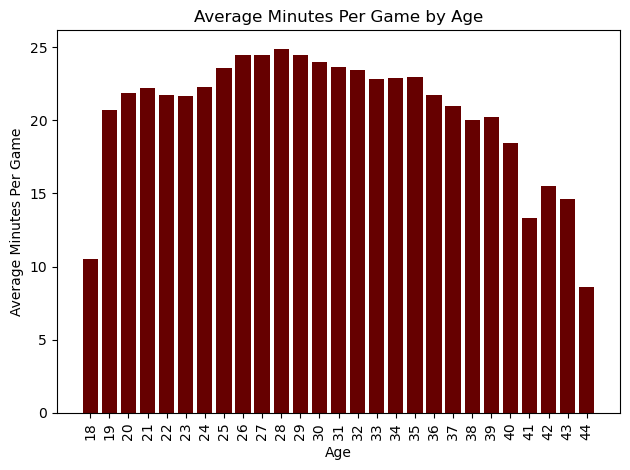

In [10]:
# Create bar graph for Minutes PG
y1 = mean_age_df["minutes per game"]
plt.figure()
plt.bar(x_axis, y1, color='#660000', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Average Minutes Per Game by Age")
plt.xlabel("Age")
plt.ylabel("Average Minutes Per Game")
plt.tight_layout()
plt.show()

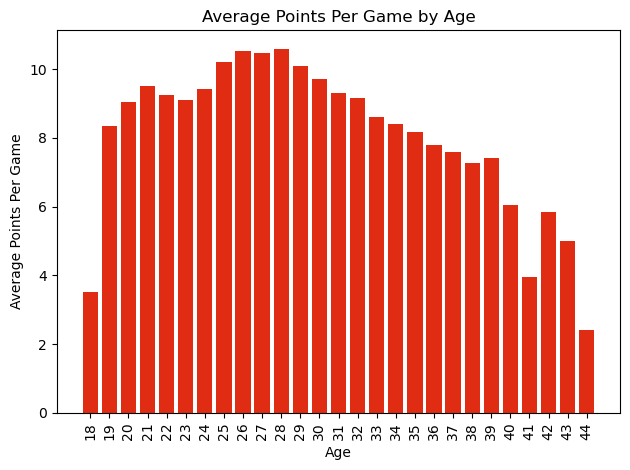

In [11]:
# Create bar graph for PPG
y2 = mean_age_df["points per game"]
plt.figure()
plt.bar(x_axis, y2, color='#E12C14', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Average Points Per Game by Age")
plt.xlabel("Age")
plt.ylabel("Average Points Per Game")
plt.tight_layout()
plt.show()

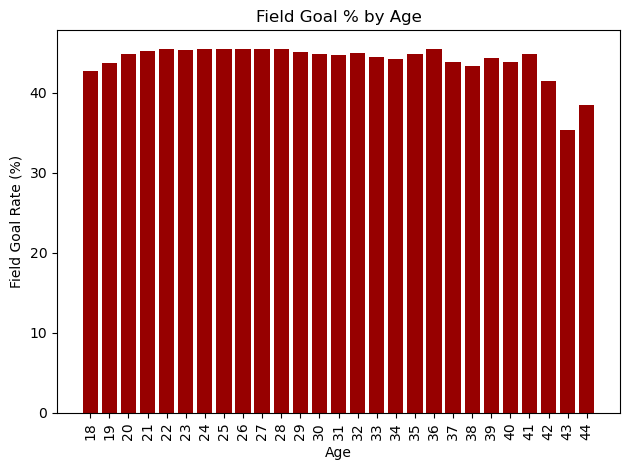

In [12]:
# Create bar graph for Field Goal %
plt.figure()
plt.bar(x_axis, mean_age_df["field goal %"], color='#970000', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Field Goal % by Age")
plt.xlabel("Age")
plt.ylabel("Field Goal Rate (%)")
plt.tight_layout()
plt.show()

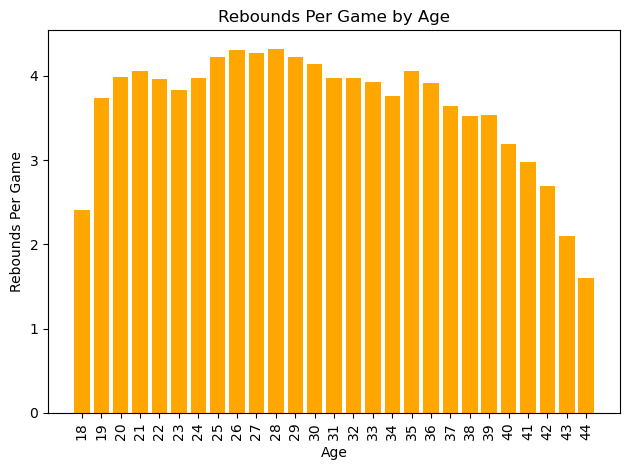

In [13]:
# Create bar graph for Rebounds PG
y3 = mean_age_df["rebounds per game"]
plt.figure()
plt.bar(x_axis, y3, color='#FFA700', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Rebounds Per Game by Age")
plt.xlabel("Age")
plt.ylabel("Rebounds Per Game")
plt.tight_layout()
plt.show()

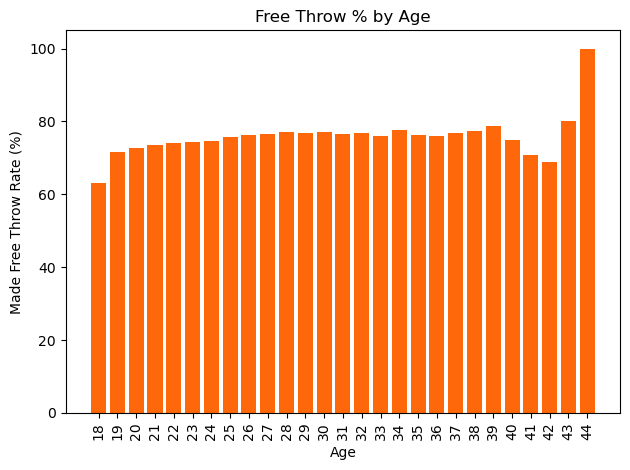

In [14]:
# Create bar graph for Free Throw %
plt.figure()
plt.bar(x_axis, mean_age_df["free throw %"], color='#FF680A', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Free Throw % by Age")
plt.xlabel("Age")
plt.ylabel("Made Free Throw Rate (%)")
plt.tight_layout()
plt.show()

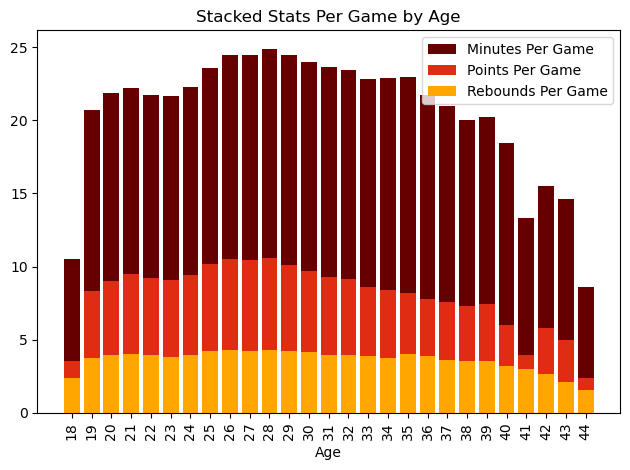

In [15]:
#Create a stacked bar chart overlaying minutes, points, and rebounds
plt.bar(x_axis, y1, color='#660000', alpha=1, align="center")
plt.bar(x_axis, y2, color='#E12C14', alpha=1, align="center")
plt.bar(x_axis, y3, color='#FFA700', alpha=1, align="center")
plt.xticks(tick_locations, mean_age_df["age"], rotation="vertical")
plt.title("Stacked Stats Per Game by Age")
plt.xlabel("Age")
plt.legend(["Minutes Per Game",
            "Points Per Game ",
            "Rebounds Per Game"])
plt.tight_layout()
plt.show()

## Question 2:
### Does position impact performance stats as measured by playing time, PPG, etc.?

In [16]:
# Split nba_data_df into five DataFrames -- one for each position
point_guard = cleaned_nba_data_df[cleaned_nba_data_df['position'].str.contains(("PG"))].copy()
shoot_guard = cleaned_nba_data_df[cleaned_nba_data_df['position'].str.contains(("SG"))].copy()
small_forward = cleaned_nba_data_df[cleaned_nba_data_df['position'].str.contains(("SF"))].copy()
center = cleaned_nba_data_df[cleaned_nba_data_df['position'].str.contains(("C"))].copy()
power_forward = cleaned_nba_data_df[cleaned_nba_data_df['position'].str.contains(("PF"))].copy()

In [17]:
# Add a position name column to each positions dataframe and merge them back together in a new dataframe
point_guard['position name'] = 'point guard'
shoot_guard['position name'] = 'shooting guard'
small_forward['position name'] = 'small forward'
center['position name'] = 'center'
power_forward['position name'] = 'power forward'

nba_data_positions = pd.concat([point_guard, shoot_guard, small_forward, center, power_forward]).reset_index(drop=True)

In [18]:
# Create a new dataframe for just the stats we're looking at
position_performance = nba_data_positions.groupby(['position name'])[['total minutes played', 'total field goals made',
                                                                        'total field goals attempted', 'total rebounds', 
                                                                        'total free-throw shots made', 'total free-throw shots attempted',
                                                                        'total points scored', 'games played']].sum()
position_performance['minutes per game'] = position_performance['total minutes played']/position_performance['games played']
position_performance['field goal rate'] = (position_performance['total field goals made']/position_performance['total field goals attempted']) *100
position_performance['rebound rate'] = position_performance['total rebounds']/position_performance['games played']
position_performance['free-throw rate'] = (position_performance['total free-throw shots made']/position_performance['total free-throw shots attempted']) * 100
position_performance['total points per game'] = position_performance['total points scored']/position_performance['games played']

In [19]:
# Drop the unneeded columns
position_performance = position_performance.drop(columns=
                                        ["total minutes played",
                                         "total field goals made",
                                         "total field goals attempted",
                                         "total rebounds",
                                         "total free-throw shots made",
                                         "total free-throw shots attempted",
                                         "total points scored",
                                         "games played"
                                        ])

# Reorder index
position_performance = position_performance.reindex(["point guard", "shooting guard", "small forward", "center", "power forward"])

In [20]:
position_dict = {"minutes_played": {}, "field_goal_rate": {}, "rebound_rate": {}, "free_throw_rate": {}, "total_points": {}}
for i, row in position_performance.iterrows():
    minutes = {
        i: position_performance['minutes per game'][i]
    }
    field_goals = {
        i: position_performance['field goal rate'][i]
    }
    rebounds = {
        i: position_performance['rebound rate'][i]
    }
    free_throws = {
        i: position_performance['free-throw rate'][i]
    }
    total_points = {
        i: position_performance['total points per game'][i]
    }
    position_dict['minutes_played'].update(minutes)
    position_dict['field_goal_rate'].update(field_goals)
    position_dict['rebound_rate'].update(rebounds)
    position_dict['free_throw_rate'].update(free_throws)
    position_dict['total_points'].update(total_points)

In [21]:
# Change dtypes from 64s to what is supported by .js
position_dict_df = pd.DataFrame(position_dict)
position_export = position_dict_df.to_dict()

In [22]:
# Export as a .js file
# Add -- let position_data = -- to beginning of file manually
with open('./Resources/js_files/position_performance.js', 'w') as fp:
    json.dump(position_export, fp, indent=4)

## Question 3:
### How have average stats per position changed over time? What are they like comapred to average yearly stats?

In [23]:
# Create a new dataframe, grouped by season start to check yearly stats
yearly_stats = nba_data_positions.groupby('season start')[['total minutes played', 'total field goals made',
                                                            'total field goals attempted', 'total offensive rebounds', 'total turnovers',
                                                            'total defensive rebounds', 'total rebounds',
                                                            'total free-throw shots made', 'total free-throw shots attempted',
                                                            'total points scored', 'total personal fouls', 'games played']].sum()
yearly_stats['minutes per game'] = yearly_stats['total minutes played']/yearly_stats['games played']
yearly_stats['field goal rate'] = (yearly_stats['total field goals made']/yearly_stats['total field goals attempted']) * 100
yearly_stats['offensive rebound rate'] = yearly_stats['total offensive rebounds']/yearly_stats['games played']
yearly_stats['defensive rebound rate'] = yearly_stats['total defensive rebounds']/yearly_stats['games played']
yearly_stats['rebound rate'] = yearly_stats['total rebounds']/yearly_stats['games played']
yearly_stats['turnover rate'] = yearly_stats['total turnovers']/yearly_stats['games played']
yearly_stats['free-throw rate'] = (yearly_stats['total free-throw shots made']/yearly_stats['total free-throw shots attempted']) * 100
yearly_stats['total points per game'] = yearly_stats['total points scored']/yearly_stats['games played']
yearly_stats['personal fouls per game'] = yearly_stats['total personal fouls']/yearly_stats['games played']


yearly_stats = yearly_stats.drop(columns = ["total minutes played", "total field goals made", "total field goals attempted",
                                        "total offensive rebounds", "total turnovers", "total defensive rebounds",
                                        "total rebounds", "total free-throw shots made", "total free-throw shots attempted",
                                        "total points scored", "total personal fouls","games played"])

KeyError: 'season start'

In [ ]:
# Create a new dataframe, grouped by season start and position name to check yearly positional stats
yearly_positions = nba_data_positions.groupby(['season start', 'position name'])[['total minutes played', 'total field goals made',
                                                            'total field goals attempted', 'total offensive rebounds', 'total turnovers',
                                                            'total defensive rebounds', 'total rebounds',
                                                            'total free-throw shots made', 'total free-throw shots attempted',
                                                            'total points scored', 'total personal fouls', 'games played']].sum()
yearly_positions['minutes per game'] = yearly_positions['total minutes played']/yearly_positions['games played']
yearly_positions['field goal rate'] = (yearly_positions['total field goals made']/yearly_positions['total field goals attempted']) * 100
yearly_positions['offensive rebound rate'] = yearly_positions['total offensive rebounds']/yearly_positions['games played']
yearly_positions['defensive rebound rate'] = yearly_positions['total defensive rebounds']/yearly_positions['games played']
yearly_positions['rebound rate'] = yearly_positions['total rebounds']/yearly_positions['games played']
yearly_positions['turnover rate'] = yearly_positions['total turnovers']/yearly_positions['games played']
yearly_positions['free-throw rate'] = (yearly_positions['total free-throw shots made']/yearly_positions['total free-throw shots attempted']) * 100
yearly_positions['total points per game'] = yearly_positions['total points scored']/yearly_positions['games played']
yearly_positions['personal fouls per game'] = yearly_positions['total personal fouls']/yearly_positions['games played']


yearly_positions = yearly_positions.drop(columns = ["total minutes played", "total field goals made", "total field goals attempted",
                                        "total offensive rebounds", "total turnovers", "total defensive rebounds",
                                        "total rebounds", "total free-throw shots made", "total free-throw shots attempted",
                                        "total points scored", "total personal fouls","games played"])

In [ ]:
# Grab the stats needed for the interactive dashboard
minutes_played = {"minutes": {"overall": {}, "point_guard": {}, "shoot_guard": {}, "small_forward": {}, "center": {}, "power_forward": {}}}
field_goal_rate =  {"field_goals": {"overall": {}, "point_guard": {}, "shoot_guard": {}, "small_forward": {}, "center": {}, "power_forward": {}}}
rebound_rate = {"rebounds": {"overall": {}, "point_guard": {}, "shoot_guard": {}, "small_forward": {}, "center": {}, "power_forward": {}}}
free_throw_rate = {"free_throws": {"overall": {}, "point_guard": {}, "shoot_guard": {}, "small_forward": {}, "center": {}, "power_forward": {}}}
total_points = {"points": {"overall": {}, "point_guard": {}, "shoot_guard": {}, "small_forward": {}, "center": {}, "power_forward": {}}}

for i, row in yearly_stats.iterrows():
    minutes = {
        i: yearly_stats['minutes per game'][i]
    }
    field_goals = {
        i: yearly_stats['field goal rate'][i]
    }
    rebounds = {
        i: yearly_stats['rebound rate'][i]
    }
    free_throws = {
        i: yearly_stats['free-throw rate'][i]
    }
    total_pts = {
        i: yearly_stats['total points per game'][i]
    }
    minutes_played['minutes']['overall'].update(minutes)
    field_goal_rate['field_goals']['overall'].update(field_goals)
    rebound_rate['rebounds']['overall'].update(rebounds)
    free_throw_rate['free_throws']['overall'].update(free_throws)
    total_points['points']['overall'].update(total_pts)

for i, row in yearly_positions.iterrows():
    if i[1] == 'point guard':
        minutes = {i[0]: yearly_positions['minutes per game'][i]}
        field_goals = {i[0]: yearly_positions['field goal rate'][i]}
        rebounds = {i[0]: yearly_positions['rebound rate'][i]}
        free_throws = {i[0]: yearly_positions['free-throw rate'][i]}
        total_pts = {i[0]: yearly_positions['total points per game'][i]}
        minutes_played['minutes']['point_guard'].update(minutes)
        field_goal_rate['field_goals']['point_guard'].update(field_goals)
        rebound_rate['rebounds']['point_guard'].update(rebounds)
        free_throw_rate['free_throws']['point_guard'].update(free_throws)
        total_points['points']['point_guard'].update(total_pts)
    if i[1] == 'shooting guard':
        minutes = {i[0]: yearly_positions['minutes per game'][i]}
        field_goals = {i[0]: yearly_positions['field goal rate'][i]}
        rebounds = {i[0]: yearly_positions['rebound rate'][i]}
        free_throws = {i[0]: yearly_positions['free-throw rate'][i]}
        total_pts = {i[0]: yearly_positions['total points per game'][i]}
        minutes_played['minutes']['shoot_guard'].update(minutes)
        field_goal_rate['field_goals']['shoot_guard'].update(field_goals)
        rebound_rate['rebounds']['shoot_guard'].update(rebounds)
        free_throw_rate['free_throws']['shoot_guard'].update(free_throws)
        total_points['points']['shoot_guard'].update(total_pts)
    if i[1] == 'small forward':
        minutes = {i[0]: yearly_positions['minutes per game'][i]}
        field_goals = {i[0]: yearly_positions['field goal rate'][i]}
        rebounds = {i[0]: yearly_positions['rebound rate'][i]}
        free_throws = {i[0]: yearly_positions['free-throw rate'][i]}
        total_pts = {i[0]: yearly_positions['total points per game'][i]}
        minutes_played['minutes']['small_forward'].update(minutes)
        field_goal_rate['field_goals']['small_forward'].update(field_goals)
        rebound_rate['rebounds']['small_forward'].update(rebounds)
        free_throw_rate['free_throws']['small_forward'].update(free_throws)
        total_points['points']['small_forward'].update(total_pts)
    if i[1] == 'center':
        minutes = {i[0]: yearly_positions['minutes per game'][i]}
        field_goals = {i[0]: yearly_positions['field goal rate'][i]}
        rebounds = {i[0]: yearly_positions['rebound rate'][i]}
        free_throws = {i[0]: yearly_positions['free-throw rate'][i]}
        total_pts = {i[0]: yearly_positions['total points per game'][i]}
        minutes_played['minutes']['center'].update(minutes)
        field_goal_rate['field_goals']['center'].update(field_goals)
        rebound_rate['rebounds']['center'].update(rebounds)
        free_throw_rate['free_throws']['center'].update(free_throws)
        total_points['points']['center'].update(total_pts)
    if i[1] == 'power forward':
        minutes = {i[0]: yearly_positions['minutes per game'][i]}
        field_goals = {i[0]: yearly_positions['field goal rate'][i]}
        rebounds = {i[0]: yearly_positions['rebound rate'][i]}
        free_throws = {i[0]: yearly_positions['free-throw rate'][i]}
        total_pts = {i[0]: yearly_positions['total points per game'][i]}
        minutes_played['minutes']['power_forward'].update(minutes)
        field_goal_rate['field_goals']['power_forward'].update(field_goals)
        rebound_rate['rebounds']['power_forward'].update(rebounds)
        free_throw_rate['free_throws']['power_forward'].update(free_throws)
        total_points['points']['power_forward'].update(total_pts)

# Merge the dictionaries for the five stats together
yearly_performance = {**minutes_played, **field_goal_rate, **rebound_rate, **free_throw_rate, **total_points}

In [ ]:
# Change dtypes from 64s to what is supported by .js
yearly_perf_df = pd.DataFrame(yearly_performance)
yearly_export = yearly_perf_df.to_dict()

In [ ]:
# Export yearly_export as a .js file
# Add -- let yearly_data = -- to beginning of file manually
with open('./Resources/js_files/yearly_performance.js', 'w') as fp:
    json.dump(yearly_export, fp, indent=4)

In [ ]:
# Reset indexes of the dataframes for ease of graph creation
yearly_stats = yearly_stats.reset_index()
yearly_positions = yearly_positions.reset_index()

In [ ]:
my=sns.barplot(data=yearly_stats, x='season start', y='minutes per game', color = '#660000')
my.set_ylabel("Average Minutes Played")
my.set_xlabel("Years")
my.set_xticklabels(my.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
ps=sns.barplot(data=yearly_stats, x='season start', y='total points per game', color='#E12C14')
ps.set_ylabel("Average Points Scored per Game")
ps.set_xlabel("Years")
ps.set_xticklabels(ps.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
fg=sns.barplot(data=yearly_stats, x='season start', y='rebound rate', color='#FFA700')
fg.set_ylabel("Average Total Rebounds per Game")
fg.set_xlabel("Years")
fg.set_xticklabels(fg.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
fg=sns.barplot(data=yearly_stats, x='season start', y='field goal rate', color='#970000')
fg.set_ylabel("Average Field Goal Made %")
fg.set_xlabel("Years")
fg.set_xticklabels(fg.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
ft=sns.barplot(data=yearly_stats, x='season start', y='free-throw rate', color='#FF680A')
ft.set_ylabel("Average Free Throw Made %")
ft.set_xlabel("Years")
ft.set_xticklabels(ft.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
tt=sns.barplot(data=yearly_stats, x='season start', y='turnover rate')
tt.set_ylabel("Average Turnovers per Game")
tt.set_xlabel("Years")
tt.set_xticklabels(tt.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
off=sns.barplot(data=yearly_stats, x='season start', y='offensive rebound rate')
off.set_ylabel("Average Offesnsive Rebounds per Game")
off.set_xlabel("Years")
off.set_xticklabels(tt.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
dfr=sns.barplot(data=yearly_stats, x='season start', y='defensive rebound rate')
dfr.set_ylabel("Average Defensive Rebounds per Game")
dfr.set_xlabel("Years")
dfr.set_xticklabels(dfr.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
fs=sns.barplot(data=yearly_stats, x='season start', y='personal fouls per game')
fs.set_ylabel("Average Personal Fouls per Game")
fs.set_xlabel("Years")
fs.set_xticklabels(fs.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for position in yearly_positions["position name"].unique():
    if position == 'center':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['minutes per game'], color='#660000')
    if position == 'point guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['minutes per game'], color='#970000')
    if position == 'shooting guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['minutes per game'], color='#E12C14')
    if position == 'small forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['minutes per game'], color='#FF680A')
    if position == 'power forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['minutes per game'], color='#FFA700')
plt.plot(yearly_stats['season start'], yearly_stats['minutes per game'], color='black', linestyle='dashed')
plt.xlabel('Year at Start of Season')
plt.ylabel('Minutes Played per Game')
c_patch = mpatches.Patch(color='#660000', label='Center')
pg_patch = mpatches.Patch(color='#970000', label='Point Guard')
sg_patch = mpatches.Patch(color='#E12C14', label='Shooting Guard')
sf_patch = mpatches.Patch(color='#FF680A', label='Small Forward')
pf_patch = mpatches.Patch(color='#FFA700', label='Power Forward')
ov_patch = mpatches.Patch(color='black', label='Overall Average')
plt.legend(handles=[c_patch, pg_patch, sg_patch, sf_patch, pf_patch, ov_patch])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for position in yearly_positions["position name"].unique():
    if position == 'center':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['total points per game'], color='#660000')
    if position == 'point guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['total points per game'], color='#970000')
    if position == 'shooting guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['total points per game'], color='#E12C14')
    if position == 'small forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['total points per game'], color='#FF680A')
    if position == 'power forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['total points per game'], color='#FFA700')
plt.plot(yearly_stats['season start'], yearly_stats['total points per game'], color='black', linestyle='dashed')
plt.xlabel('Year at Start of Season')
plt.ylabel('Total Points per Game')
c_patch = mpatches.Patch(color='#660000', label='Center')
pg_patch = mpatches.Patch(color='#970000', label='Point Guard')
sg_patch = mpatches.Patch(color='#E12C14', label='Shooting Guard')
sf_patch = mpatches.Patch(color='#FF680A', label='Small Forward')
pf_patch = mpatches.Patch(color='#FFA700', label='Power Forward')
ov_patch = mpatches.Patch(color='black', label='Overall Average')
plt.legend(handles=[c_patch, pg_patch, sg_patch, sf_patch, pf_patch, ov_patch])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for position in yearly_positions["position name"].unique():
    if position == 'center':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['rebound rate'], color='#660000')
    if position == 'point guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['rebound rate'], color='#970000')
    if position == 'shooting guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['rebound rate'], color='#E12C14')
    if position == 'small forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['rebound rate'], color='#FF680A')
    if position == 'power forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['rebound rate'], color='#FFA700')
plt.plot(yearly_stats['season start'], yearly_stats['rebound rate'], color='black', linestyle='dashed')
plt.xlabel('Year at Start of Season')
plt.ylabel('Total Rebounds per Game')
c_patch = mpatches.Patch(color='#660000', label='Center')
pg_patch = mpatches.Patch(color='#970000', label='Point Guard')
sg_patch = mpatches.Patch(color='#E12C14', label='Shooting Guard')
sf_patch = mpatches.Patch(color='#FF680A', label='Small Forward')
pf_patch = mpatches.Patch(color='#FFA700', label='Power Forward')
ov_patch = mpatches.Patch(color='black', label='Overall Average')
plt.legend(handles=[c_patch, pg_patch, sg_patch, sf_patch, pf_patch, ov_patch])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for position in yearly_positions["position name"].unique():
    if position == 'center':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['field goal rate'], color='#660000')
    if position == 'point guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['field goal rate'], color='#970000')
    if position == 'shooting guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['field goal rate'], color='#E12C14')
    if position == 'small forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['field goal rate'], color='#FF680A')
    if position == 'power forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['field goal rate'], color='#FFA700')
plt.plot(yearly_stats['season start'], yearly_stats['field goal rate'], color='black', linestyle='dashed')
plt.xlabel('Year at Start of Season')
plt.ylabel('Field Goal Made %')
c_patch = mpatches.Patch(color='#660000', label='Center')
pg_patch = mpatches.Patch(color='#970000', label='Point Guard')
sg_patch = mpatches.Patch(color='#E12C14', label='Shooting Guard')
sf_patch = mpatches.Patch(color='#FF680A', label='Small Forward')
pf_patch = mpatches.Patch(color='#FFA700', label='Power Forward')
ov_patch = mpatches.Patch(color='black', label='Overall Average')
plt.legend(handles=[c_patch, pg_patch, sg_patch, sf_patch, pf_patch, ov_patch])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for position in yearly_positions["position name"].unique():
    if position == 'center':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['free-throw rate'], color='#660000')
    if position == 'point guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['free-throw rate'], color='#970000')
    if position == 'shooting guard':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['free-throw rate'], color='#E12C14')
    if position == 'small forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['free-throw rate'], color='#FF680A')
    if position == 'power forward':
        position_data  = yearly_positions[yearly_positions["position name"] == position]
        plt.plot(position_data['season start'], position_data['free-throw rate'], color='#FFA700')
plt.plot(yearly_stats['season start'], yearly_stats['free-throw rate'], color='black', linestyle='dashed')
plt.xlabel('Year at Start of Season')
plt.ylabel('Free Throw Made %')
c_patch = mpatches.Patch(color='#660000', label='Center')
pg_patch = mpatches.Patch(color='#970000', label='Point Guard')
sg_patch = mpatches.Patch(color='#E12C14', label='Shooting Guard')
sf_patch = mpatches.Patch(color='#FF680A', label='Small Forward')
pf_patch = mpatches.Patch(color='#FFA700', label='Power Forward')
ov_patch = mpatches.Patch(color='black', label='Overall Average')
plt.legend(handles=[c_patch, pg_patch, sg_patch, sf_patch, pf_patch, ov_patch])
plt.show()

## Question 4:
### What is the aggressiveness of players like by position?

In [ ]:
# Grab the stats needed for the interactive dashboard
avg_personal_fouls = {"fouls": {"point_guard": {}, "shoot_guard": {}, "small_forward": {}, "center": {}, "power_forward": {}}}
avg_total_rebounds =  {"rebounds": {"point_guard": {}, "shoot_guard": {}, "small_forward": {}, "center": {}, "power_forward": {}}}
avg_blocks = {"blocks": {"point_guard": {}, "shoot_guard": {}, "small_forward": {}, "center": {}, "power_forward": {}}}

for i, row in nba_data_positions.iterrows():
    if row['position name'] == 'point guard':
        fouls = {i: row['avg personal fouls']}
        rebounds = {i: row['avg total rebounds']}
        blocks = {i: row['avg blocks']}
        avg_personal_fouls['fouls']['point_guard'].update(fouls)
        avg_total_rebounds['rebounds']['point_guard'].update(rebounds)
        avg_blocks['blocks']['point_guard'].update(blocks)
    if row['position name'] == 'shooting guard':
        fouls = {i: row['avg personal fouls']}
        rebounds = {i: row['avg total rebounds']}
        blocks = {i: row['avg blocks']}
        avg_personal_fouls['fouls']['shoot_guard'].update(fouls)
        avg_total_rebounds['rebounds']['shoot_guard'].update(rebounds)
        avg_blocks['blocks']['shoot_guard'].update(blocks)
    if row['position name'] == 'small forward':
        fouls = {i: row['avg personal fouls']}
        rebounds = {i: row['avg total rebounds']}
        blocks = {i: row['avg blocks']}
        avg_personal_fouls['fouls']['small_forward'].update(fouls)
        avg_total_rebounds['rebounds']['small_forward'].update(rebounds)
        avg_blocks['blocks']['small_forward'].update(blocks)
    if row['position name'] == 'center':
        fouls = {i: row['avg personal fouls']}
        rebounds = {i: row['avg total rebounds']}
        blocks = {i: row['avg blocks']}
        avg_personal_fouls['fouls']['center'].update(fouls)
        avg_total_rebounds['rebounds']['center'].update(rebounds)
        avg_blocks['blocks']['center'].update(blocks)
    if row['position name'] == 'power forward':
        fouls = {i: row['avg personal fouls']}
        rebounds = {i: row['avg total rebounds']}
        blocks = {i: row['avg blocks']}
        avg_personal_fouls['fouls']['power_forward'].update(fouls)
        avg_total_rebounds['rebounds']['power_forward'].update(rebounds)
        avg_blocks['blocks']['power_forward'].update(blocks)

# Merge the dictionaries for the five stats together
player_aggression = {**avg_personal_fouls, **avg_total_rebounds, **avg_blocks}

In [ ]:
# Change dtypes from 64s to what is supported by .js
player_aggress_df = pd.DataFrame(player_aggression)
player_aggress_export = player_aggress_df.to_dict()

In [ ]:
# Export yearly_export as a .js file
# Add -- let aggression_data = -- to beginning of file manually
with open('./Resources/js_files/player_aggression.js', 'w') as fp:
    json.dump(player_aggress_export, fp, indent=4)

In [ ]:
# Create a scatter plot to depict all positions and their fouls vs. rebounds
plt.figure(figsize=(10,10))
for position in nba_data_positions["position name"].unique():
    if position == 'center':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#660000', alpha=0.5)
    if position == 'point guard':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#970000', alpha=0.5)
    if position == 'shooting guard':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#E12C14', alpha = 0.5)
    if position == 'small forward':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#FF680A', alpha = 0.5)
    if position == 'power forward':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#FFA700', alpha = 0.5)
plt.title('Scatter Plot of Foul Plays vs. Rebounds by Position')
plt.xlabel('Foul Plays per Game')
plt.ylabel('Rebounds per Game')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nba_data_positions['avg personal fouls'], nba_data_positions['avg total rebounds'])
regression = nba_data_positions['avg personal fouls'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nba_data_positions['avg personal fouls'], regression, color='black', linestyle='dashed')
plt.annotate(line_eq,(4,0.5),fontsize=20,color="black")
c_patch = mpatches.Patch(color='#660000', label='Center')
pg_patch = mpatches.Patch(color='#970000', label='Point Guard')
sg_patch = mpatches.Patch(color='#E12C14', label='Shooting Guard')
sf_patch = mpatches.Patch(color='#FF680A', label='Small Forward')
pf_patch = mpatches.Patch(color='#FFA700', label='Power Forward')
plt.legend(handles=[c_patch, pg_patch, sg_patch, sf_patch, pf_patch])
plt.show()

In [ ]:
# Create a separate scatter plot for each position and their fouls vs. rebounds
for position in nba_data_positions["position name"].unique():
    if position == 'center':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#660000')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg total rebounds'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,0),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Centers')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 18.5])
        plt.show()
    if position == 'point guard':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#970000')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg total rebounds'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,0),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Point Guards')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 18.5])
        plt.show()
    if position == 'shooting guard':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#E12C14')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg total rebounds'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,0),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Shooting Guards')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 18.5])
        plt.show()
    if position == 'small forward':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#FF680A')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg total rebounds'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,0),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Small Forwards')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 18.5])
        plt.show()
    if position == 'power forward':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg total rebounds'], color='#FFA700')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg total rebounds'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,0.5),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Power Forwards')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 18.5])
        plt.show()


In [ ]:
# Create a scatter plot to depict all positions and their fouls vs. rebounds
plt.figure(figsize=(10,10))
for position in nba_data_positions["position name"].unique():
    if position == 'center':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#660000', alpha=0.5)
    if position == 'point guard':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#970000', alpha=0.5)
    if position == 'shooting guard':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#E12C14', alpha = 0.5)
    if position == 'small forward':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#FF680A', alpha = 0.5)
    if position == 'power forward':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#FFA700', alpha = 0.5)
plt.title('Scatter Plot of Foul Plays vs. Blocks by Position')
plt.xlabel('Foul Plays per Game')
plt.ylabel('Blocks per Game')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nba_data_positions['avg personal fouls'], nba_data_positions['avg blocks'])
regression = nba_data_positions['avg personal fouls'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nba_data_positions['avg personal fouls'], regression, color='black', linestyle='dashed')
plt.annotate(line_eq,(4,0.5),fontsize=20,color="black")
c_patch = mpatches.Patch(color='#660000', label='Center')
pg_patch = mpatches.Patch(color='#970000', label='Point Guard')
sg_patch = mpatches.Patch(color='#E12C14', label='Shooting Guard')
sf_patch = mpatches.Patch(color='#FF680A', label='Small Forward')
pf_patch = mpatches.Patch(color='#FFA700', label='Power Forward')
plt.legend(handles=[c_patch, pg_patch, sg_patch, sf_patch, pf_patch])
plt.show()

In [ ]:
# Create a separate scatter plot for each position and their fouls vs. rebounds
for position in nba_data_positions["position name"].unique():
    if position == 'center':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#660000')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg blocks'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,-0.35),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Centers')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 6.5])
        plt.show()
    if position == 'point guard':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#970000')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg blocks'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,-0.35),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Point Guards')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 6.5])
        plt.show()
    if position == 'shooting guard':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#E12C14')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg blocks'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,-0.35),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Shooting Guards')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 6.5])
        plt.show()
    if position == 'small forward':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#FF680A')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg blocks'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,-0.35),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Small Forwards')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 6.5])
        plt.show()
    if position == 'power forward':
        position_data  = nba_data_positions[nba_data_positions["position name"] == position]
        plt.figure(figsize=(10,10))
        plt.scatter(position_data['avg personal fouls'], position_data['avg blocks'], color='#FFA700')
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(position_data['avg personal fouls'], position_data['avg blocks'])
        regression = position_data['avg personal fouls'] * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.plot(position_data['avg personal fouls'], regression, color='black', linestyle='dashed')
        plt.annotate(line_eq,(4,-0.35),fontsize=20,color="black")
        plt.title('Scatter Plot of Foul Plays vs. Rebounds for Power Forwards')
        plt.xlabel('Foul Plays per Game')
        plt.ylabel('Rebounds per Game')
        ax = plt.gca()
        ax.set_xlim([-0.5, 6.5])
        ax.set_ylim([-0.5, 6.5])
        plt.show()
